In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
work_dir = '/content/drive/My Drive/SKILLIT Courses/AI Level 2/Regression'
os.chdir(work_dir) # mi sposto in cartella dove si trova il file .csv

In [3]:
!pip install matplotlib
!pip install numpy
!pip install pandas
# !pip install sklearn
!pip install scikit-learn
!pip install soccerplots

In [4]:
!pip install soccerplots

In [35]:
#@title STRUMENTO RICERCA CALCIATORI CON CARATTERISTICHE SIMILI { run: "auto", vertical-output: true, display-mode: "form" }

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Clustering giocatori/Data/masterdata1.xlsx')

Player_Name = "N. Barella" # @param {type:"string"} #CAMBIATO DA DROPDOWN A INPUT

Max_age_players =  37#@param {type:"integer"}
Market_value_in_euros = 5000000000 #@param {type:"number"}
No_of_Similar_players = 10 #@param {type:"integer"}
Metrics = "All" #@param ["Attacking and creativity", "Passing and progression", "Defensive actions", "All"]

def parameters(Metrics):
  col_dict = {'Attacking and creativity':0, 'Passing and progression':1,'Defensive actions':2}
  l = []

  for i in range(1, 4):
    path = str(i)+".txt"
    f = open(path, 'r') #prima creato con 'x'
    l.append([j[:-1] for j in f.readlines() if j[:2]!='//'])
    f.close()

  return l[col_dict[Metrics]]


warnings.filterwarnings("ignore")
def player_similarity(df,target,age,Market_value):
  target_player = df[df['Player']==target]
  target_position = target_player['Categorical position']
  i= target_player.index[0]

  df=df[df['Categorical position']==target_position[i]]

  col_names = []

  if Metrics!= 'All':
    col_names = parameters(Metrics)

  else:
    for col in data.columns:
        col_names.append(col)
    del col_names[0:22]

  X = df[col_names]

  kmeans = KMeans(n_clusters = 4,random_state=100)
  kmeans.fit(X)
  df['cluster'] = kmeans.predict(X)


  final_table = df[['Player','Team','Categorical position','Position','Age','Market value','Contract expires','cluster']]
  target_player = df[df['Player']==target]
  target_cluster = target_player['cluster']
  i= target_player.index[0]

  final_table = final_table[final_table['cluster']==target_cluster[i]]
  final_table['Similarity']=0.00
  #final_table['Distance']=0.0000
  for j,row in df.iterrows():
    x = row['cluster']
    if x==target_cluster[i]:
      comparing_player = row[col_names]
      target = target_player[col_names]
      A=np.array(target).reshape(-1)
      B=np.array(comparing_player).reshape(-1)

      cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

      # uso funzioni disponibili in linalg (algebra lineare)

      final_table['Similarity'][j]=cos_sim*100
      #final_table['Distance'][j]=(1-cos_sim)


  final_table.drop(final_table[final_table['Age'] >= age].index, inplace = True)
  final_table.drop(final_table[final_table['Market value'] >= Market_value].index, inplace = True)
  final_table.drop(final_table[final_table['Player'] == Player_Name].index, inplace = True)
  final_table.sort_values("Similarity", axis = 0, ascending = False,inplace = True)
  final_table.reset_index(inplace=True)
  final_table.index = np.arange(1,len(final_table)+1)
  final_table=final_table.drop(['index'], axis = 1)


  return final_table



final_table = player_similarity(data,Player_Name,Max_age_players,Market_value_in_euros)
final_table.head(No_of_Similar_players)


,Player,Team,Categorical position,Position,Age,Market value,Contract expires,cluster,Similarity
1,Óliver Torres,Sevilla,Centre Midfielder,"LCMF, AMF, RCMF",26,13000000,2024-06-30,0,94.388506
2,J. Boëtius,Mainz 05,Centre Midfielder,"AMF, LCMF",27,4500000,2022-06-30,0,93.379366
3,Koke,Atlético Madrid,Centre Midfielder,"DMF, LCMF, RCMF",29,60000000,2024-06-30,0,92.631792
4,Manu Trigueros,Villarreal,Centre Midfielder,"RCMF, RW, RCMF",29,11000000,2022-06-30,0,92.406260
5,M. Sabitzer,RB Leipzig,Centre Midfielder,"RDMF, LCMF, LDMF",27,42000000,2022-06-30,0,92.373781
6,J. Toornstra,Feyenoord,Centre Midfielder,"RCMF, DMF, RCMF",31,2000000,2022-06-30,0,92.277750
7,T. Kroos,Real Madrid,Centre Midfielder,"LCMF, LCMF",31,50000000,2023-06-30,0,91.822746
8,Luis Alberto,Lazio,Centre Midfielder,LCMF,28,50000000,2025-06-30,0,91.734875
9,L. Pellegrini,Roma,Centre Midfielder,"RCMF, RWF, AMF",24,37000000,2022-06-30,0,91.720232
10,Mikel Merino,Real Sociedad,Centre Midfielder,"LCMF, LDMF, LCMF",24,40000000,2025-06-30,0,91.662804


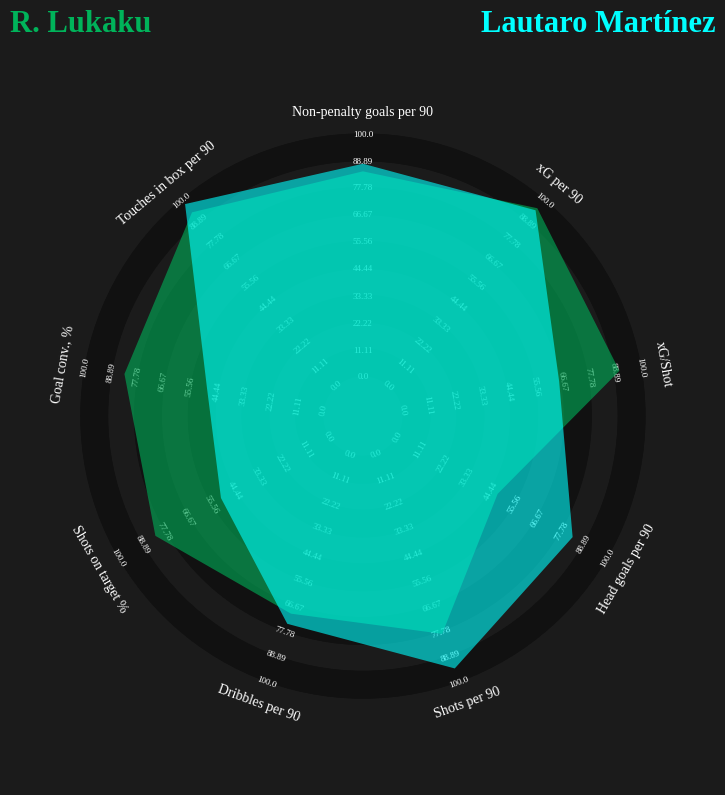

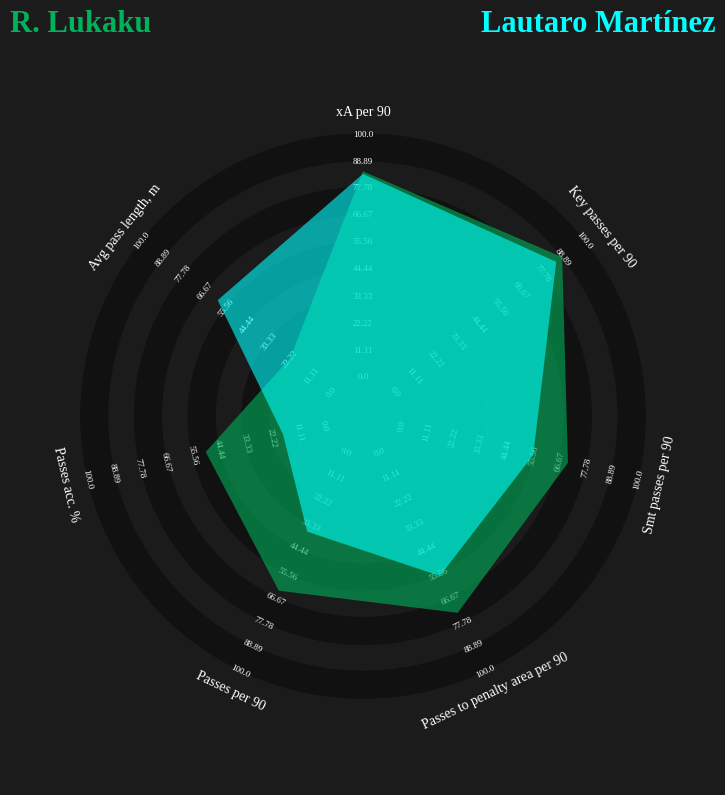

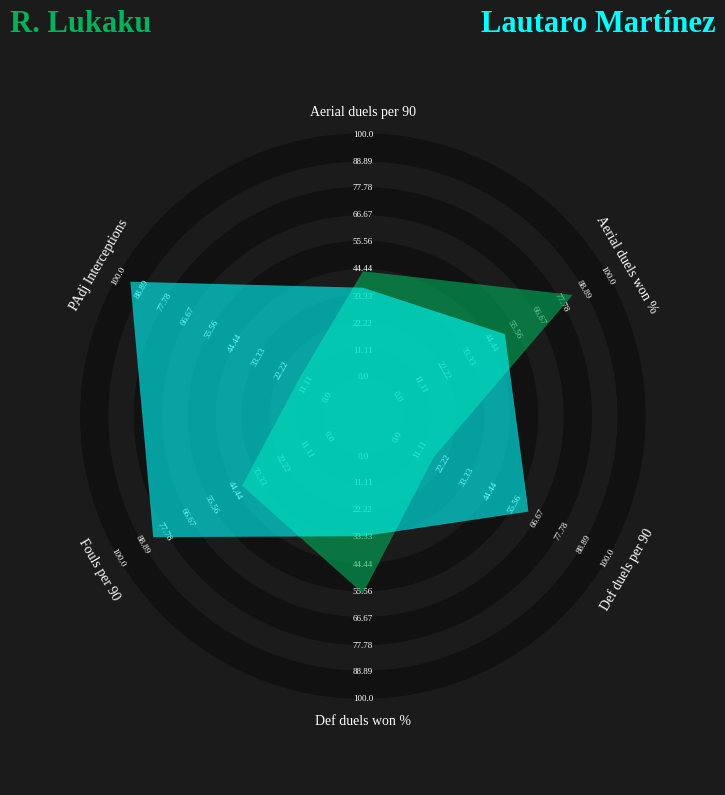

In [44]:
#@title RAFFRONTO GRAFICO DI 2 CALCIATORI{ run: "auto", vertical-output: true, display-mode: "form" }
from soccerplots.radar_chart import Radar
import pandas as pd

comparing_player = "Lautaro Martínez" #@param {type:"string"}

Player_Name = 'R. Lukaku' #@param {type:"string"}

target_player = data[data['Player']==Player_Name]

p1t = target_player['Team']
comparing_player1 = data[data['Player']==comparing_player]
p2t = comparing_player1['Team']
frames = [target_player, comparing_player1]


df = pd.concat(frames)


def radar(data,num,bg,pc,lc,rc,player1,player2,comparing_player,Player_Name,Metrics):
    radar = Radar(background_color=bg, patch_color=pc, label_color=lc,
            range_color=rc)


    label1 = ['Non-penalty goals per 90','xG per 90','xG/Shot','Head goals per 90','Shots per 90','Dribbles per 90','Shots on target %','Goal conv., %','Touches in box per 90']
    label2=['xA per 90','Key passes per 90','Smt passes per 90','Passes to penalty area per 90','Passes per 90','Passes acc. %','Avg pass length, m']
    label3=['Aerial duels per 90','Aerial duels won %','Def duels per 90','Def duels won %','Fouls per 90','PAdj Interceptions']


    ranges1 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100),
                               (0,100), (0, 100), (0, 100)]
    ranges2 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100),
                               (0,100)]
    ranges3 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100)]

    # approssimo a due cifre decimali

    attacking = [[round(data['Non-penalty goals per 90'].values[0], 2), round(data['xG per 90'].values[0], 2), round(data['xG/Shot'].values[0], 2),
                      round(data['Head goals per 90'].values[0], 2), round(data['Shots per 90'].values[0], 2),
                      round(data['Dribbles per 90'].values[0], 2), round(data['Shots on target, %'].values[0], 2),
                      round(data['Goal conversion, %'].values[0], 2), round(data['Touches in box per 90'].values[0], 2)],[round(data['Non-penalty goals per 90'].values[1], 2), round(data['xG per 90'].values[1], 2), round(data['xG/Shot'].values[1], 2),
                      round(data['Head goals per 90'].values[1], 2), round(data['Shots per 90'].values[1], 2),
                      round(data['Dribbles per 90'].values[1], 2), round(data['Shots on target, %'].values[1], 2),
                      round(data['Goal conversion, %'].values[1], 2), round(data['Touches in box per 90'].values[1], 2)]]

    passing = [[round(data['xA per 90'].values[0], 2), round(data['Key passes per 90'].values[0], 2), round(data['Smart passes per 90'].values[0], 2),
                round(data['Passes to penalty area per 90'].values[0], 2), round(data['Passes per 90'].values[0], 2),
                round(data['Accurate passes, %'].values[0], 2), round(data['Average pass length, m'].values[0], 2)],[round(data['xA per 90'].values[1], 2), round(data['Key passes per 90'].values[1], 2), round(data['Smart passes per 90'].values[1], 2),
                round(data['Passes to penalty area per 90'].values[1], 2), round(data['Passes per 90'].values[1], 2),
                round(data['Accurate passes, %'].values[1], 2), round(data['Average pass length, m'].values[1], 2)]]


    defending = [[round(data['Aerial duels per 90'].values[0], 2), round(data['Aerial duels won, %'].values[0], 2), round(data['Defensive duels per 90'].values[0], 2),
                 round(data['Defensive duels won, %'].values[0], 2), round(data['Fouls per 90'].values[0], 2),
                 round(data['PAdj Interceptions'].values[0], 2)],[round(data['Aerial duels per 90'].values[1], 2), round(data['Aerial duels won, %'].values[1], 2), round(data['Defensive duels per 90'].values[1], 2),
                 round(data['Defensive duels won, %'].values[1], 2), round(data['Fouls per 90'].values[1], 2),
                 round(data['PAdj Interceptions'].values[1], 2)]]

    title = dict(
    title_name= Player_Name,
    title_color='#00b35a',
    title_name_2= comparing_player,
    title_color_2='#00ffff',
    title_fontsize=22)

    # i significati dei parametri di plot_radar sono spiegati molto bene a:
    # https://github.com/Slothfulwave612/soccerplots/blob/master/docs/radar_chart.md

    if Metrics=='Attacking and creativity':
      attacking=radar.plot_radar(ranges=ranges1,params=label1,values=attacking,radar_color=[player1, player2],
              filename="attacking.png",end_color=bg,dpi=600,compare=True,title=title)
    elif Metrics=='Passing and progression':
      passing=radar.plot_radar(ranges=ranges2,params=label2,values=passing,radar_color=[player1, player2],
              filename="passing.png",end_color=bg,dpi=600,compare=True,title=title)
    elif Metrics=='Defensive actions':
      defending=radar.plot_radar(ranges=ranges3,params=label3,values=defending,radar_color=[player1, player2],
              filename="defending.png",end_color=bg,dpi=600,compare=True,title=title)
    else:
      attacking=radar.plot_radar(ranges=ranges1,params=label1,values=attacking,radar_color=[player1, player2],
              filename="attacking.png",end_color=bg,dpi=600,compare=True,title=title)

      passing=radar.plot_radar(ranges=ranges2,params=label2,values=passing,radar_color=[player1, player2],
              filename="passing.png",end_color=bg,dpi=600,compare=True,title=title)

      defending=radar.plot_radar(ranges=ranges3,params=label3,values=defending,radar_color=[player1, player2],
              filename="defending.png",end_color=bg,dpi=600,compare=True,title=title)


radar(df,2,"#1B1B1B","#111111","#FFFFFF","#FFFFFF","#00b35a","#00ffff",comparing_player,Player_Name,Metrics)

# per visualizzazione alternativa si può scambiare ad es. #00b35a con #D4011D e #00ffff con #0020C4
# colori si possono trovare su colorhexa tra gli altri


In [72]:
#@title LISTA DI GIOCATORI SIMILI A 2 CALCIATORI SPECIFICI{ run: "auto", vertical-output: true, display-mode: "form" }


import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Clustering giocatori/Data/masterdata1.xlsx')

Player_Name1 = "C. Pulišić" #@param ["R. Krishna","V. van Dijk"] {allow-input: true}
Player_Name2 = "F. Chiesa" #@param ["R. Krishna","V. van Dijk"] {allow-input: true}

# quelli sopra sono esempi per il menu a tendina
# i nomi tra virgolette cambiano in tempo reale a seconda di cosa si scrive nella label

Percentage_of_player1 = 50 #@param {type:"slider", min:1, max:99, step:1}
p = Percentage_of_player1/100

def player_similarity(df, player1, player2, p):
    #print(playerOne.head(), playerTwo.head())

    target_player1 = df[df['Player']==player1]
    target_position1 = target_player1['Categorical position']
    i= target_player1.index[0]


    target_player2 = df[df['Player']==player2]
    target_position2 = target_player2['Categorical position']
    o = target_player2.index[0]




    df1=df[df['Categorical position']==target_position1[i]]
    df2=df[df['Categorical position']==target_position2[o]]


    if target_position1[i]!=target_position2[o]:
        frames = [df1, df2]
        df = pd.concat(frames)
    else:
        df = df1
    col_names = []
    for col in data.columns:
        col_names.append(col)
    del col_names[0:22]

    X = df[col_names]

    kmeans = KMeans(n_clusters = 4,random_state=100)
    kmeans.fit(X)

    # algoritmo k-means che suddivide i gruppi di giocatori

    df['cluster'] = kmeans.predict(X)
    #print(df['cluster'].value_counts())
    temptable = df[['Player','Team','Categorical position','Position','Age','Market value','Contract expires','cluster']]

    playerOne = df.loc[df['Player']==player1]
    playerTwo = df.loc[df['Player']==player2]
    #print(playerOne)
    #print(playerTwo)
    cluster1 = playerOne['cluster'].values[0]
    cluster2 = playerTwo['cluster'].values[0]


    table1 = temptable[temptable['cluster']==cluster1]
    table2 = temptable[temptable['cluster']==cluster2]

    if cluster1!=cluster2:
        frames = [table1, table2]
        final_table = pd.concat(frames)
    else:
        final_table = table1

    final_table['Similarity']=0.00
    #final_table['Distance']=0.0000
    target1 = playerOne[col_names]
    target2 = playerTwo[col_names]
    T1 = np.array(target1)#.reshape(-1)
    T2=np.array(target2)#.reshape(-1)

    for j,row in df.iterrows():
        x = row['cluster']
        if x==cluster1 or x==cluster2:
            comparing_player = row[col_names]
            B=np.array(comparing_player)#.reshape(-1)
            A = (p)*T1 + (1-p)*T2

            cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
            final_table['Similarity'][j]=cos_sim*100

            #final_table['Distance'][j]=(1-cos_sim)


    final_table.drop(final_table[final_table['Player'] == Player_Name1].index, inplace = True)
    final_table.drop(final_table[final_table['Player'] == Player_Name2].index, inplace = True)
    final_table.sort_values("Similarity", axis = 0, ascending = False,inplace = True)
    final_table.reset_index(inplace=True)
    #final_table=final_table.drop(['cluster','index'], axis = 1)


    return final_table



final_table = player_similarity(data, Player_Name1, Player_Name2, p)
final_table.head(10)

,index,Player,Team,Categorical position,Position,Age,Market value,Contract expires,cluster,Similarity
0,409,J. Grealish,Aston Villa,Wingers,"LAMF, LW, AMF",25,60000000,2025-06-30,1,94.30409969246105
1,1346,L. Sané,Bayern München,Wingers,"RAMF, RW, LAMF",25,60000000,2025-06-30,1,94.26491677845938
2,1352,L. Bailey,Bayer Leverkusen,Wingers,"RWF, RW, LWB",23,35000000,2023-06-30,1,93.96822706946426
3,404,S. Mané,Liverpool,Wingers,LWF,28,100000000,2023-06-30,1,93.71488047893777
4,2386,R. Saponara,Spezia,Wingers,"LW, LWF, RWF",29,2000000,2022-06-30,1,93.59920081561881
5,408,P. Foden,Manchester City,Wingers,"LWF, LAMF, LCMF",20,70000000,2024-06-30,1,93.5509877622719
6,883,K. Toko Ekambi,Olympique Lyonnais,Wingers,"LWF, LW, CF",28,15000000,2024-06-30,1,93.43633968966122
7,1345,S. Gnabry,Bayern München,Wingers,"LAMF, RAMF",25,70000000,2023-06-30,1,93.10226225859526
8,2306,A. Hakimi,Internazionale,Wingers,RWB,22,50000000,2025-06-30,1,93.07206824536266
9,1351,G. Reyna,Borussia Dortmund,Wingers,"LAMF, LWF, RAMF",18,38000000,2025-06-30,1,93.01289774351203


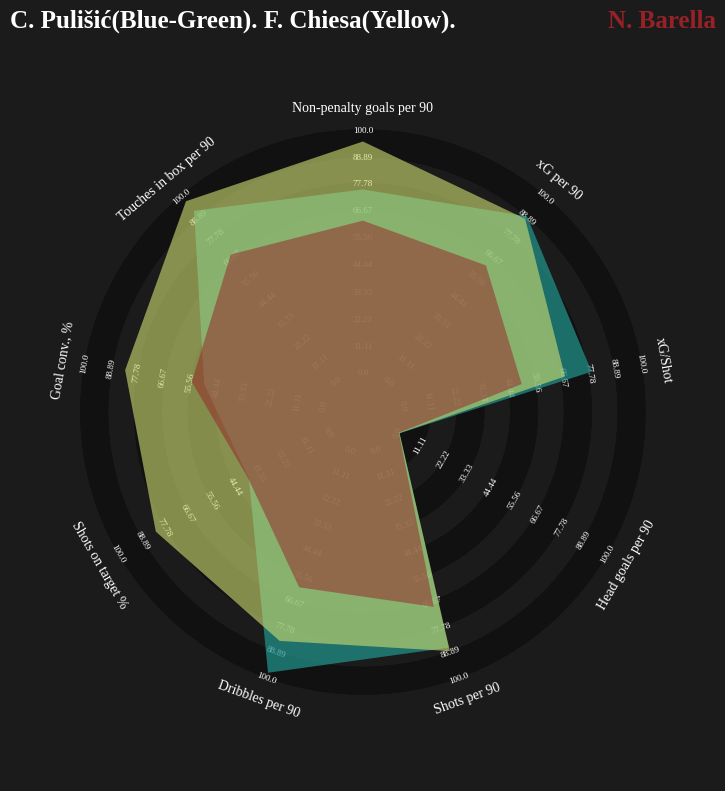

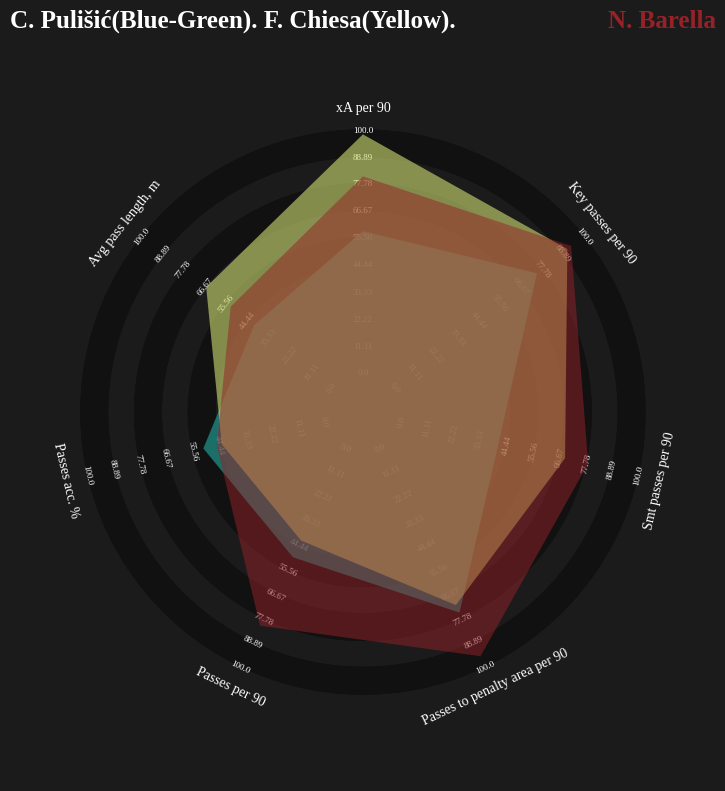

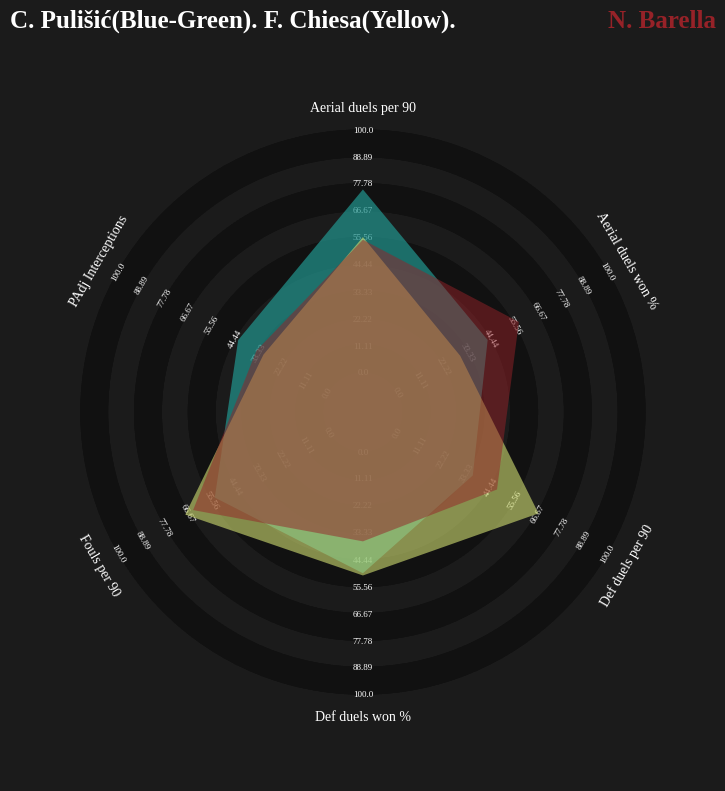

In [77]:
#@title CONFRONTO GRAFICO DI 3 GIOCATORI{ run: "auto", vertical-output: true, display-mode: "form" }

from soccerplots.radar_chart import Radar
import pandas as pd

# ai due giocatori scelti nella barra di "interpolation for player requirement" se ne aggiunge un terzo
# si possono cambiare anche qui volendo definendo nostri target_player 1 e 2

comparing_player = "N. Barella" #@param {type:"string"}


target_player1 = data[data['Player']==Player_Name1]
target_player2 = data[data['Player']==Player_Name2]

comparing_player1 = data[data['Player']==comparing_player]

frames = [target_player1,target_player2,comparing_player1]


df = pd.concat(frames)
df.head()

from soccerplots.radar_chart import Radar
import pandas as pd



def radar3(data,num,bg,pc,lc,rc,player1,player2):
    radar = Radar(background_color=bg, patch_color=pc, label_color=lc,
            range_color=rc)

    label1 = ['Non-penalty goals per 90','xG per 90','xG/Shot','Head goals per 90','Shots per 90','Dribbles per 90','Shots on target %','Goal conv., %','Touches in box per 90']
    label2=['xA per 90','Key passes per 90','Smt passes per 90','Passes to penalty area per 90','Passes per 90','Passes acc. %','Avg pass length, m']
    label3=['Aerial duels per 90','Aerial duels won %','Def duels per 90','Def duels won %','Fouls per 90','PAdj Interceptions']


    ranges1 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100),
                               (0,100), (0, 100), (0, 100)]
    ranges2 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100),
                               (0,100)]
    ranges3 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100)]

    attacking = [[round(data['Non-penalty goals per 90'].values[0], 2), round(data['xG per 90'].values[0], 2), round(data['xG/Shot'].values[0], 2),
                 round(data['Head goals per 90'].values[0], 2), round(data['Shots per 90'].values[0], 2),
                  round(data['Dribbles per 90'].values[0], 2), round(data['Shots on target, %'].values[0], 2),
                             round(data['Goal conversion, %'].values[0], 2), round(data['Touches in box per 90'].values[0], 2)],[round(data['Non-penalty goals per 90'].values[1], 2), round(data['xG per 90'].values[1], 2), round(data['xG/Shot'].values[1], 2),
                             round(data['Head goals per 90'].values[1], 2), round(data['Shots per 90'].values[1], 2),
                             round(data['Dribbles per 90'].values[1], 2), round(data['Shots on target, %'].values[1], 2),
                             round(data['Goal conversion, %'].values[1], 2), round(data['Touches in box per 90'].values[1], 2)],
                            [round(data['Non-penalty goals per 90'].values[2], 2), round(data['xG per 90'].values[2], 2), round(data['xG/Shot'].values[2], 2),
                             round(data['Head goals per 90'].values[2], 2), round(data['Shots per 90'].values[2], 2),
                             round(data['Dribbles per 90'].values[2], 2), round(data['Shots on target, %'].values[2], 2),
                             round(data['Goal conversion, %'].values[2], 2), round(data['Touches in box per 90'].values[2], 2)]]

    passing = [[round(data['xA per 90'].values[0], 2), round(data['Key passes per 90'].values[0], 2), round(data['Smart passes per 90'].values[0], 2),
                              round(data['Passes to penalty area per 90'].values[0], 2), round(data['Passes per 90'].values[0], 2),
                              round(data['Accurate passes, %'].values[0], 2), round(data['Average pass length, m'].values[0], 2)],[round(data['xA per 90'].values[1], 2), round(data['Key passes per 90'].values[1], 2), round(data['Smart passes per 90'].values[1], 2),
                              round(data['Passes to penalty area per 90'].values[1], 2), round(data['Passes per 90'].values[1], 2),
                              round(data['Accurate passes, %'].values[1], 2), round(data['Average pass length, m'].values[1], 2)],
                            [round(data['xA per 90'].values[2], 2), round(data['Key passes per 90'].values[2], 2), round(data['Smart passes per 90'].values[2], 2),
                              round(data['Passes to penalty area per 90'].values[2], 2), round(data['Passes per 90'].values[2], 2),
                              round(data['Accurate passes, %'].values[2], 2), round(data['Average pass length, m'].values[2], 2)]]


    defending = [[round(data['Aerial duels per 90'].values[0], 2), round(data['Aerial duels won, %'].values[0], 2), round(data['Defensive duels per 90'].values[0], 2),
                             round(data['Defensive duels won, %'].values[0], 2), round(data['Fouls per 90'].values[0], 2),
                             round(data['PAdj Interceptions'].values[0], 2)],[round(data['Aerial duels per 90'].values[1], 2), round(data['Aerial duels won, %'].values[1], 2), round(data['Defensive duels per 90'].values[1], 2),
                             round(data['Defensive duels won, %'].values[1], 2), round(data['Fouls per 90'].values[1], 2),
                             round(data['PAdj Interceptions'].values[1], 2)],
                            [round(data['Aerial duels per 90'].values[2], 2), round(data['Aerial duels won, %'].values[2], 2), round(data['Defensive duels per 90'].values[2], 2),
                             round(data['Defensive duels won, %'].values[2], 2), round(data['Fouls per 90'].values[2], 2),
                             round(data['PAdj Interceptions'].values[2], 2)]]

    Player = Player_Name1 +"(Blue-Green). "+ Player_Name2+"(Yellow)."

    title = dict(
    title_name= Player,
    title_color='#FFFFFF',
    title_name_2= comparing_player,
    title_color_2='#962228',
    title_fontsize=18)

    # sotto il disegno per il terzo giocatore

    attacking=radar.plot_radar(ranges=ranges1,params=label1,values=attacking,radar_color=[player1, player2,"#962228"],
                           filename="attacking.png",end_color=bg,dpi=600,title=title,alphas=[0.7, 0.6,0.5],compare=True)

    passing=radar.plot_radar(ranges=ranges2,params=label2,values=passing,radar_color=[player1, player2,"#962228"],
                           filename="passing.png",end_color=bg,dpi=600,alphas=[0.7, 0.6,0.5],compare=True,title=title)

    defending=radar.plot_radar(ranges=ranges3,params=label3,values=defending,radar_color=[player1, player2,"#962228"],
                           filename="defending.png",end_color=bg,dpi=600,alphas=[0.7, 0.6,0.5],compare=True,title=title)



    # radar per i primi 2 giocatori

radar3(df,2,"#1B1B1B","#111111","#FFFFFF","#FFFFFF","#229690","#d2df72")